# SMS Spam  Detection

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. 
It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.

In [2]:
# Import the Warining 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# labraries 
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
# read the file 
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [5]:
# show the top 5 rows 
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# shape of data frame 
df.shape

(5572, 2)

In [8]:
# show details of the enitre data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# no missing value in data Set
df.isnull().sum() # so their is not any null value in data set .

label      0
message    0
dtype: int64

 ### Data Cleaning

In [10]:
# importing the labarires 
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB

In [11]:
ps = PorterStemmer()

In [12]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][i]) # Removeing the numerical value and not letter value from data
    review = review.lower() # converting all letter into lower case
    review = nltk.word_tokenize(review) # to ignore the some  word 
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
# converting the text in vector on bases of frequency 
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer(max_features=5000)

In [15]:
x = cv.fit_transform(corpus).toarray()

In [16]:
# shape of data frame
x.shape # training data

(5572, 5000)

In [17]:
# converting the categorical variable into dummies variable
y = pd.get_dummies(df['label'])

In [18]:
# testing data
y = y.iloc[:, 1]

In [19]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: uint8

In [20]:
# train test Split
from sklearn.model_selection import train_test_split

In [21]:
# spliting the data into  training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
spam_detect_model = MultinomialNB().fit(x_train, y_train) # classification of discrit variable

In [24]:
#Prediction 
y_pred = spam_detect_model.predict(x_test)

In [35]:
# printing actual and predicted output data
a = {'Actual': y_test, 'Predicted': y_pred}

In [26]:
# show the last 50 output
pd.DataFrame(a).tail(50)

,Actual,Predicted
3428,0,0
1852,0,0
2925,0,0
5375,0,0
556,0,0
2686,1,1
1855,0,0
1002,1,1
2928,0,0
1721,0,0


Train confusion matrix


<AxesSubplot:>

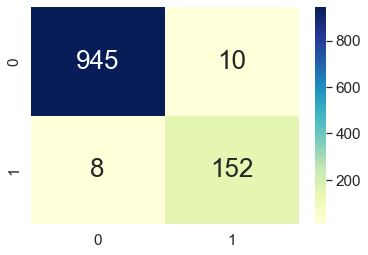

In [28]:
# confusion Martix 
nv=confusion_matrix(y_test, y_pred)
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(nv, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.95      0.94       160

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115

